In [24]:
import pandas as pd
import numpy as np
from numpy import random
import math
import scipy.stats as stats
import statistics

import matplotlib.pyplot as plt
import seaborn as sns


diamonds = pd.read_csv('C:/Users/olivi/Documents/Ironhack/DAFT_212/module_2/Project_Week_4/Cleaned_Diamonds.csv', index_col=[0])
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_n,color_n
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,5
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,5
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,5
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,1
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,2,6
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2,6
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,2,6
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,1,2


In [25]:
diamonds['carat'].describe()

count    53932.000000
mean         0.797862
std          0.473959
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

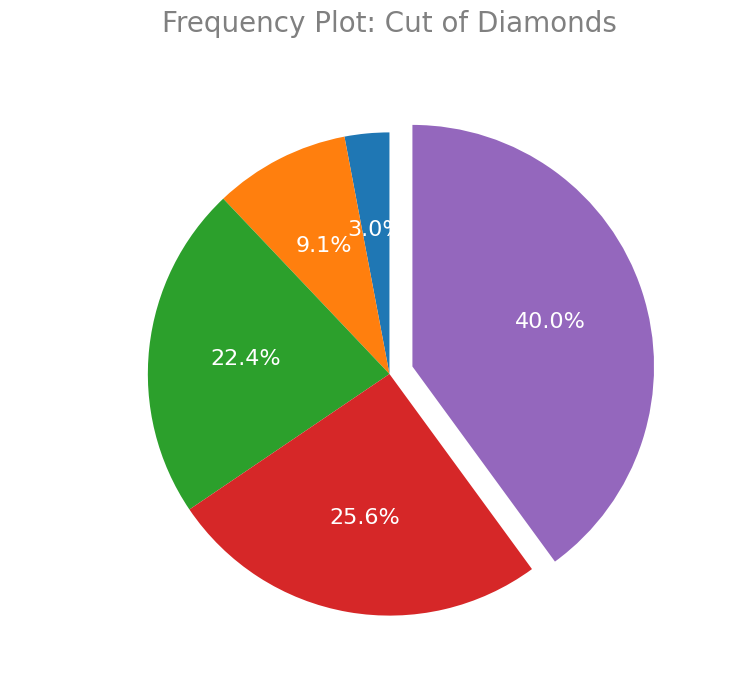

In [26]:
#MATPLOTLIB: FOCUS ON PHYSICAL ATTRIBUTES OF DIAMONDS

# 1_Piechart: diamonds per quality of cut

groupdata = diamonds.groupby(diamonds["cut"]).count()
groupdata

x_vals = []
y_vals = []
for i in [0, 1, 4, 3, 2]: 
    x_vals.append(groupdata.index[i])
    y_vals.append(groupdata.iloc[i,0])

explode = (0, 0, 0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Very good')
plt.figure(figsize = [8,8])
plt.pie(y_vals, explode=explode, labels=x_vals, autopct='%1.1f%%', 
        textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'White'}, startangle=90)

plt.title("Frequency Plot: Cut of Diamonds\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Grey'})

plt.show()


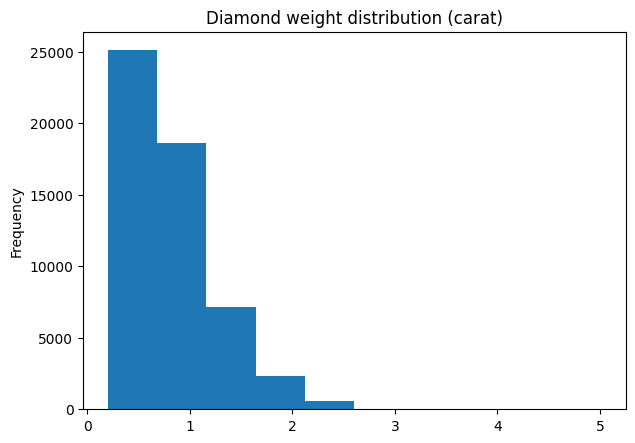

In [27]:
# 2_Histogram or barchart: distribution of diamond weight in carat (15 bins)


plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
x = diamonds['carat']
plt.hist(x, bins=10)
plt.gca().set(title='Diamond weight distribution (carat)', ylabel='Frequency')

plt.show()


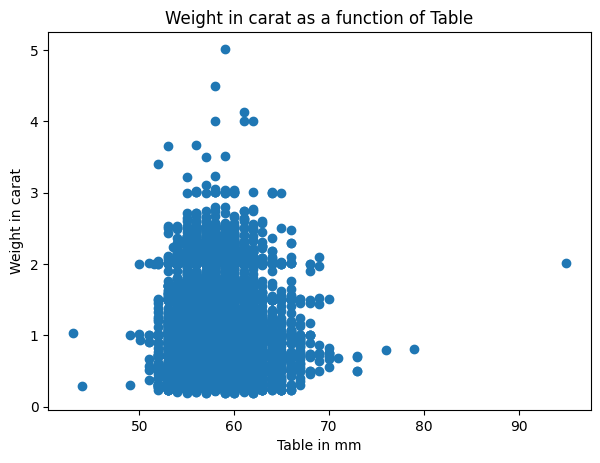

In [28]:
# 4_ Scatterplot: weight in carat as a function of table (size)

table = diamonds['table']
carat = diamonds['carat']
plt.scatter(table, carat)
xlabel = 'Table in mm'
ylabel = 'Weight in carat'
plt.gca().set(title='Weight in carat as a function of Table', xlabel='Table in mm', ylabel='Weight in carat');
plt.show()


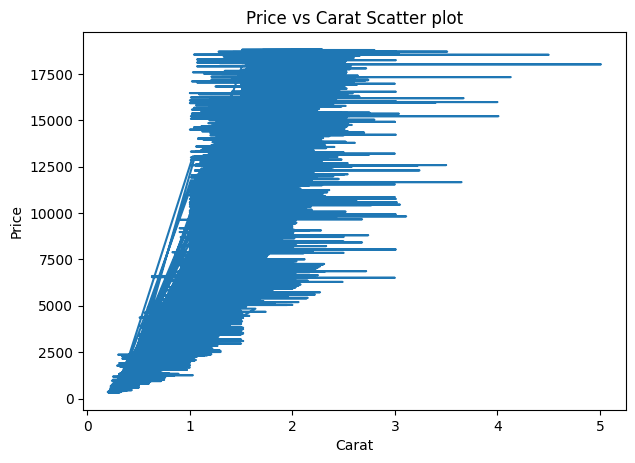

In [34]:
# 3_Linear relationship:  

carat = diamonds['carat']
price = diamonds['price']
plt.plot(carat, price)
xlabel = 'Carat'
ylabel = 'Price'
plt.gca().set(title='Price vs Carat Scatter plot', xlabel='Carat', ylabel='Price')
plt.show()



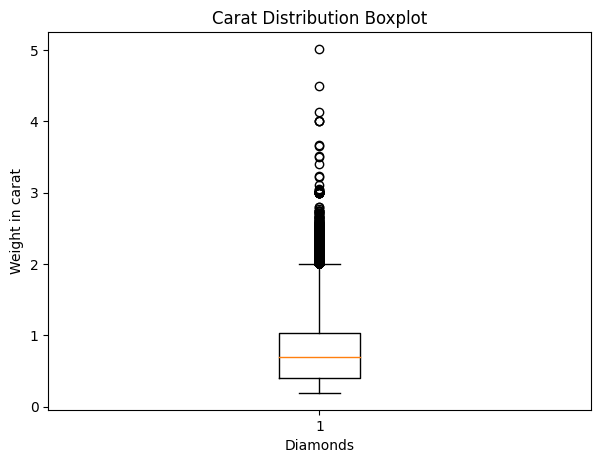

In [40]:
# 5_Boxplot carat to look for outliers

columns = [diamonds['carat']]

fig, ax = plt.subplots()
ax.boxplot(columns)
plt.gca().set(title='Carat Distribution Boxplot', xlabel='Diamonds', ylabel='Weight in carat')
plt.show()

In [52]:
diamonds['carat'].describe()

count    53932.000000
mean         0.797862
std          0.473959
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

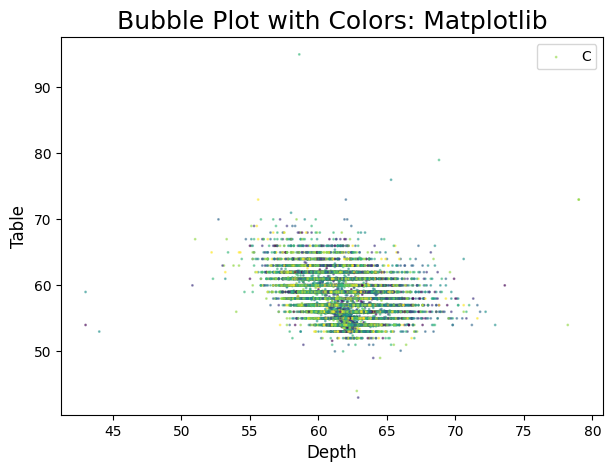

In [65]:
# 6_3D chart: Bubble chart | Physical characteristics of diamonds 

bubbles = pd.DataFrame({ 'Depth': diamonds['depth'],
                         'Table' : diamonds['table'],
                         'Colors' : diamonds['color_n'],
                        "Diamond count": diamonds.index.value_counts()})

plt.scatter('Depth', 'Table',
             s='Diamond count',
             c='Colors',
             alpha=0.5, data=bubbles)
plt.xlabel("Depth", size=12)
plt.ylabel("Table", size=12)
plt.title("Bubble Plot with Colors: Matplotlib", size=18)
plt.legend('Colors')

In [66]:
# 7_Radar chart: compare average weight for different type cuts

import plotly.express as px

df1 = diamonds.groupby('cut')['carat'].mean().to_frame()
df1.reset_index(inplace=True)
fig = px.line_polar(df1, r='carat', theta='cut', title='Average diamond weight by cut type', line_close=True)
figsize=(8,8)

fig.show()


C:\Users\olivi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
# 8_Multiple series chart: price and carat as a function of table


